<a href="https://colab.research.google.com/github/jtianesq/havardsfa/blob/master/SFAv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# load dataset
url = "https://raw.githubusercontent.com/jtianesq/havardsfa/master/sfa_combined_raw.csv"
dataframe = pd.read_csv(url,sep="|",header=0,encoding='windows-1252') #the encoding part is necessary!!!
print(dataframe.head(5))

    Score                                           Industry  Year Founded  \
0  Accept  hazardous materials and inspection training se...          1982   
1  Accept                       commercial cleaning services          1983   
2  Accept                                water tank services          1962   
3  Accept                  oil and propane delivery services          1981   
4  Accept                         energy inspection services          1986   

                           URLtrim  Recurring Revenue (million) Margins  \
0                     aidtrain.com                          0.5  medium   
1          alliancemaintenance.com                          0.5     low   
2          americanpipeandtank.com                          0.5  medium   
3  beaudryoilpropanedieselfuel.com                          0.5     low   
4               cci-inspection.com                          0.5  medium   

  Stable Cash Flow Industry Growth Fragmented Industry  \
0              low    

In [3]:
print(dataframe.columns)
print(dataframe.shape)

Index(['Score', 'Industry', 'Year Founded', 'URLtrim',
       'Recurring Revenue (million)', 'Margins', 'Stable Cash Flow',
       'Industry Growth', 'Fragmented Industry', 'Straightforward Operations',
       'Exogenous Risk', 'Barriers to Entry', 'Employee Estimate',
       'Stickiness', 'Supplier Power', 'Customer Power',
       'Service vs Project/Product', 'Longterm Relationships',
       'Customer Concentration'],
      dtype='object')
(236, 19)


Print out unique values for each column

In [4]:
cols = ['Year Founded','Recurring Revenue (million)', 'Margins', 'Stable Cash Flow',
       'Industry Growth', 'Fragmented Industry', 'Straightforward Operations',
       'Exogenous Risk', 'Barriers to Entry', 'Employee Estimate',
       'Stickiness', 'Supplier Power', 'Customer Power',
       'Service vs Project/Product', 'Longterm Relationships',
       'Customer Concentration']
for col in dataframe[cols].columns.values:
    print(col, dataframe[col].unique())

Year Founded [1982 1983 1962 1981 1986 2008 1995 1980 1992 1979 1974 1991 1971 1939
 1946 1990 2002 1959 1960 1881 1949 1950 1970 1987 1975 1873 1968 1932
 2013 1998 1972 2011 2006 2007 2015 2003 2014 1977 1969 2005 2001 1966
 1954 1928 1997 2000 1994 2010 1965 1964 1956 1988 2004 1996 1985 1940
 2016 1989 1953 1936 1963 1958 1948 2009 1955 1887 1976 1993 1978 1918]
Recurring Revenue (million) [5.0e-01 7.4e+00 4.3e+00 4.4e+00 1.2e+01 3.7e+01 2.2e+01 7.0e+00 1.4e+01
 7.9e+00 2.1e+01 5.0e+00 8.0e+00 1.3e+01 1.6e+01 4.2e+01 1.7e+01 3.0e+01
 2.8e+00 1.0e+01 5.1e+01 2.6e+01 5.0e-02 4.0e-01 1.5e+00 4.8e+01 3.0e-01
 1.0e+00 3.9e+00 2.0e-01 6.4e+00 7.2e+00 4.5e+00 1.5e+01 1.0e-01 2.3e+01
 9.8e+00 4.6e+00 4.1e+00 7.0e-02 4.0e+01 1.2e+00 8.3e+00 7.2e+01 4.2e+00
 2.6e+00 3.2e+00 2.9e+01 3.0e+00 2.9e+00 3.8e+01 4.0e+00 2.5e+01 5.0e+01
 6.5e+00 1.8e+01 2.8e+01 1.1e+01 2.0e+01 4.4e+01 1.8e+00 7.0e-01 3.5e+01
 2.0e+00 6.0e+00 2.7e+01 9.0e+00 2.4e+01 5.2e+01 5.3e+01 1.9e+01 3.4e+00]
Margins ['medium' 

In [6]:
#data exploration
dataframe['Score'].value_counts()

Reject    192
Accept     43
reject      1
Name: Score, dtype: int64

In [7]:
#There is a record with value 'reject' instead of 'Reject', fix this issue with the following code
dataframe['Score']=np.where(dataframe['Score'] =='reject', 'Reject', dataframe['Score'])

#Convert categorical score to numerical values: reject is 0, accept is 1.
dataframe['Score']=np.where(dataframe['Score'] =='Reject', 0, dataframe['Score'])
dataframe['Score']=np.where(dataframe['Score'] =='Accept', 1, dataframe['Score'])
dataframe['Score']=dataframe['Score'].astype(int)
dataframe['Score'].value_counts()

0    193
1     43
Name: Score, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


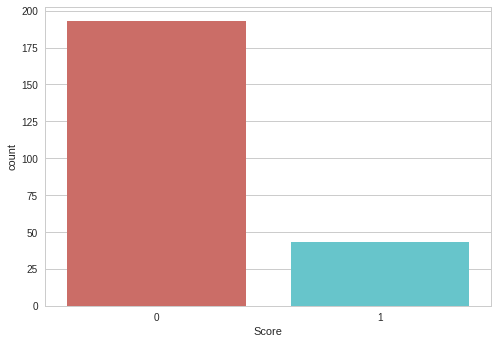

In [8]:
sns.countplot(x='Score',data=dataframe, palette='hls')
plt.show()

The sample is unbalaneced.  As shown in the calculation below, the ratio of reject to accept is 83:16.

In [9]:
count_reject = len(dataframe[dataframe['Score']==0])
count_accept = len(dataframe[dataframe['Score']==1])
pct_of_reject = count_reject/(count_reject + count_accept)
print("percentage of reject is", pct_of_reject*100)
pct_of_accept = count_accept/(count_reject+count_accept)
print("percentage of accept", pct_of_accept*100)

percentage of reject is 81.77966101694916
percentage of accept 18.220338983050848


In [10]:
dataframe.groupby('Score').mean()

,Year Founded,Recurring Revenue (million)
Score,,
0,1989.362694,9.881969
1,1991.255814,9.741860


As shown above, there is a big difference between the mean of Recurrening Revenue of Accepted and Rejected records. This is caused by few large companies in the dataset with large amount of revenue and employee size which are way above the limit of search fund acquisition. These outliner should be excluded from the dataset.

In [11]:
dataframe.describe()

,Score,Year Founded,Recurring Revenue (million)
count,236.000000,236.000000,236.000000
mean,0.182203,1989.707627,9.856441
std,0.386832,23.365625,12.842066
min,0.000000,1873.000000,0.050000
25%,0.000000,1980.000000,0.500000
50%,0.000000,1995.000000,4.150000
75%,0.000000,2008.000000,13.000000
max,1.000000,2016.000000,72.000000


The maximum value for Recurring Revuenue is 23000 which is way out of range since the 75% quatile is 20. Therefore, in the next step, I filtered out records with Recurring Revenue > 50. After that, the mean value for Recurring Revenue from Accept and Reject subsets looks similar.

In [12]:
dataframe=dataframe[dataframe['Recurring Revenue (million)']<=50]
dataframe.groupby('Score').mean()

,Year Founded,Recurring Revenue (million)
Score,,
0,1989.46875,9.558438
1,1992.15000,6.572500


Calculate categorical means for other categorical variables to better understand the distribution of the data

In [13]:
dataframe.groupby('Margins').mean()

,Score,Year Founded,Recurring Revenue (million)
Margins,,,
high,0.500000,1998.500000,17.050000
low,0.153061,1992.969388,5.700204
medium,0.176923,1987.376923,11.317692


In [14]:
dataframe.groupby('Stable Cash Flow').mean()

,Score,Year Founded,Recurring Revenue (million)
Stable Cash Flow,,,
high,0.500000,2000.500000,27.500000
low,0.202614,1992.379085,5.952418
medium,0.103896,1984.792208,14.706494


In [15]:
dataframe.groupby('Industry Growth').mean()

,Score,Year Founded,Recurring Revenue (million)
Industry Growth,,,
high,0.122449,1996.571429,11.489796
low,0.186667,1983.546667,7.274667
medium,0.185185,1991.351852,9.162222


In [16]:
dataframe.groupby('Employee Estimate').mean()

,Score,Year Founded,Recurring Revenue (million)
Employee Estimate,,,
11-50,0.219178,1994.356164,7.269863
2-10,0.203125,1997.296875,1.544063
201-1000,0.000000,1996.111111,13.666667
51-200,0.127907,1980.046512,15.646512


Do one-hot-encoding for all categorical variables by creating dummy variables

In [17]:
cat_vars=['Margins', 'Stable Cash Flow',
       'Industry Growth', 'Fragmented Industry', 'Straightforward Operations',
       'Exogenous Risk', 'Barriers to Entry', 'Employee Estimate',
       'Stickiness', 'Supplier Power', 'Customer Power',
       'Service vs Project/Product', 'Longterm Relationships',
       'Customer Concentration']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(dataframe[var], prefix=var)
    dataframe1=dataframe.join(cat_list)
    dataframe=dataframe1
    
cat_vars=['Margins', 'Stable Cash Flow',
       'Industry Growth', 'Fragmented Industry', 'Straightforward Operations',
       'Exogenous Risk', 'Barriers to Entry', 'Employee Estimate',
       'Stickiness', 'Supplier Power', 'Customer Power',
       'Service vs Project/Product', 'Longterm Relationships',
       'Customer Concentration','Industry', 'URLtrim']
dataframe_vars=dataframe.columns.values.tolist()
to_keep=[i for i in dataframe_vars if i not in cat_vars]
dataframe_final=dataframe[to_keep]
dataframe_final.columns.values
print(dataframe_final.shape)

(232, 42)


View attribute correlation after encoding

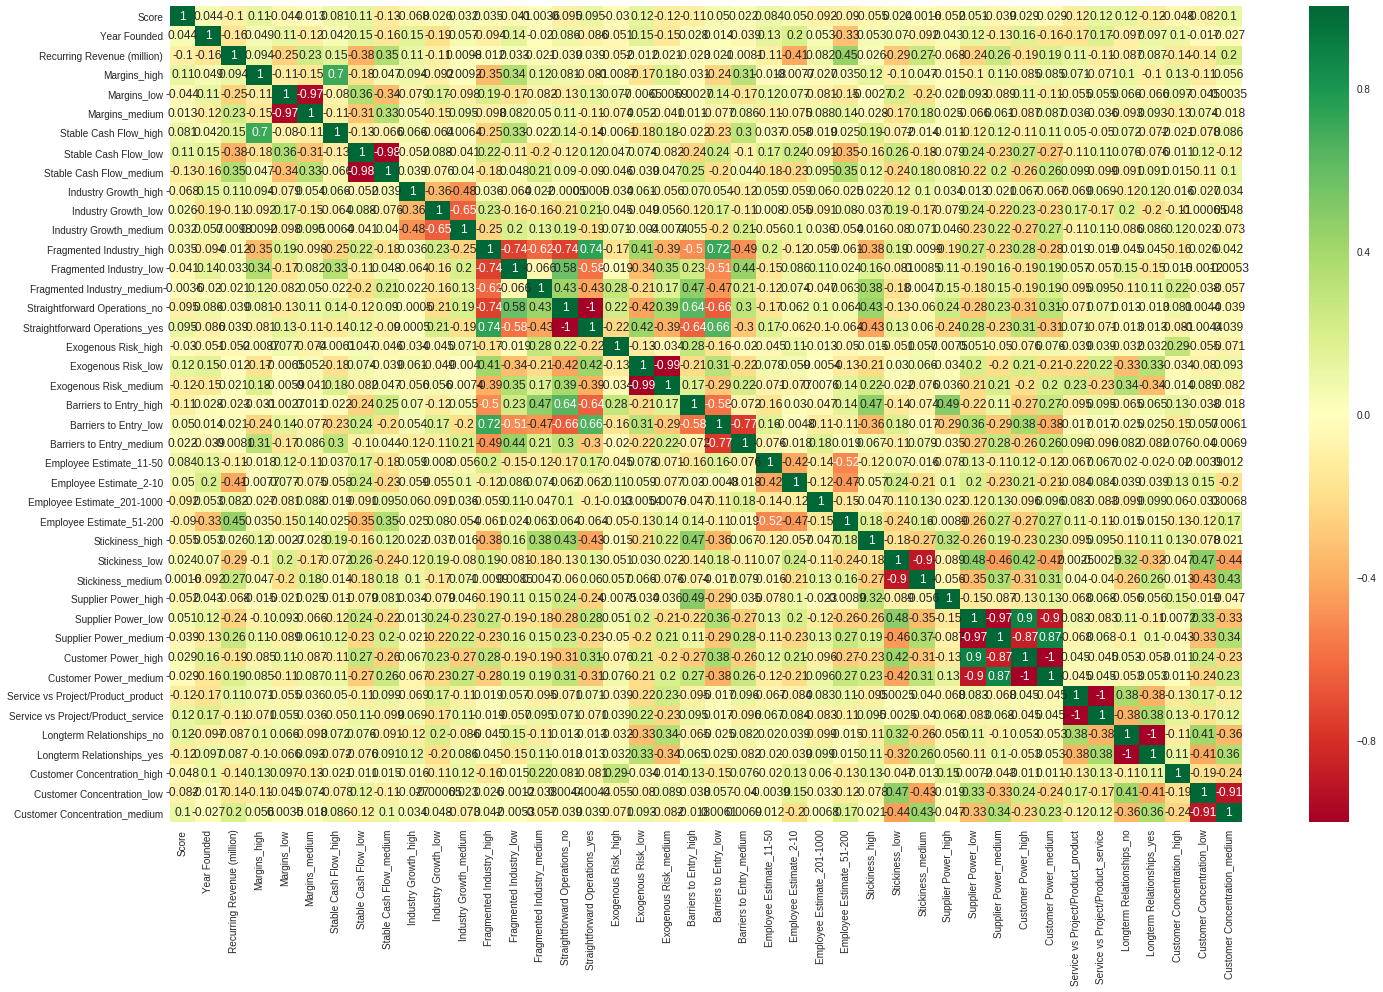

In [18]:
#view attribute correlation
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

plt.subplots(figsize=(24,15))
sns.heatmap(dataframe_final.corr(), annot=True, cmap="RdYlGn")
plt.show()

Oversampling using SMOTE


In [0]:
X = dataframe_final.loc[:, dataframe_final.columns != 'Score']
y = dataframe_final.loc[:, dataframe_final.columns == 'Score']

In [20]:
!pip install imblearn

In [21]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Score'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of reject in oversampled data",len(os_data_y[os_data_y['Score']==0]))
print("Number of accept data",len(os_data_y[os_data_y['Score']==1]))
print("Proportion of reject data in oversampled data is ",len(os_data_y[os_data_y['Score']==0])/len(os_data_X))
print("Proportion of accept data in oversampled data is ",len(os_data_y[os_data_y['Score']==1])/len(os_data_X))

length of oversampled data is  264
Number of reject in oversampled data 132
Number of accept data 132
Proportion of reject data in oversampled data is  0.5
Proportion of accept data in oversampled data is  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
data_final_vars=dataframe_final.columns.values.tolist()
y=['Score']
X=[i for i in data_final_vars if i not in y]

print(X)
print(len(X))

['Year Founded', 'Recurring Revenue (million)', 'Margins_high', 'Margins_low', 'Margins_medium', 'Stable Cash Flow_high', 'Stable Cash Flow_low', 'Stable Cash Flow_medium', 'Industry Growth_high', 'Industry Growth_low', 'Industry Growth_medium', 'Fragmented Industry_high', 'Fragmented Industry_low', 'Fragmented Industry_medium', 'Straightforward Operations_no', 'Straightforward Operations_yes', 'Exogenous Risk_high', 'Exogenous Risk_low', 'Exogenous Risk_medium', 'Barriers to Entry_high', 'Barriers to Entry_low', 'Barriers to Entry_medium', 'Employee Estimate_11-50', 'Employee Estimate_2-10', 'Employee Estimate_201-1000', 'Employee Estimate_51-200', 'Stickiness_high', 'Stickiness_low', 'Stickiness_medium', 'Supplier Power_high', 'Supplier Power_low', 'Supplier Power_medium', 'Customer Power_high', 'Customer Power_medium', 'Service vs Project/Product_product', 'Service vs Project/Product_service', 'Longterm Relationships_no', 'Longterm Relationships_yes', 'Customer Concentration_high', 

Recursive Feature Elimination

In [23]:
#from sklearn import datasets
from sklearn.feature_selection import RFE

logreg = LogisticRegression()

rfe = RFE(logreg, 30)
rfe = rfe.fit(os_data_X.astype(float), os_data_y.values.ravel().astype(int))
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True False  True  True  True  True False False False
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True False False False  True  True  True  True  True  True
  True  True  True False  True]
[12 10  1  1  3  1  1  1  1  9  2  8  1  1  1  1 11  1  1  1  1  1  1  1
  1  1  1  5  4  7  1  1  1  1  1  1  1  1  1  6  1]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [24]:
#cols = ['Customer Concentration_medium']
cols = rfe.get_support().tolist() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(cols, os_data_X.columns.values):
    if bool:
        new_features.append(feature)
        
X=os_data_X[new_features]
y=os_data_y['Score']

print(os_data_y['Score'].unique())

[0 1]


In [25]:
print(X.columns)

Index(['Margins_high', 'Margins_low', 'Stable Cash Flow_high',
       'Stable Cash Flow_low', 'Stable Cash Flow_medium',
       'Industry Growth_high', 'Fragmented Industry_low',
       'Fragmented Industry_medium', 'Straightforward Operations_no',
       'Straightforward Operations_yes', 'Exogenous Risk_low',
       'Exogenous Risk_medium', 'Barriers to Entry_high',
       'Barriers to Entry_low', 'Barriers to Entry_medium',
       'Employee Estimate_11-50', 'Employee Estimate_2-10',
       'Employee Estimate_201-1000', 'Employee Estimate_51-200',
       'Stickiness_high', 'Supplier Power_low', 'Supplier Power_medium',
       'Customer Power_high', 'Customer Power_medium',
       'Service vs Project/Product_product',
       'Service vs Project/Product_service', 'Longterm Relationships_no',
       'Longterm Relationships_yes', 'Customer Concentration_high',
       'Customer Concentration_medium'],
      dtype='object')


In [26]:
import statsmodels.api as sm
logit_model=sm.Logit(y.astype(int),X.astype(float))
result=logit_model.fit(method='lbfgs',cov_type='HC0')
print(result.summary2())

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                                                       Results: Logit
Model:                                   Logit                                Pseudo R-squared:                     0.424   
Dependent Variable:                      Score                                AIC:                                  258.7347
Date:                                    2018-12-03 02:46                     BIC:                                  344.5574
No. Observations:                        264                                  Log-Likelihood:                       -105.37 
Df Model:                                23                                   LL-Null:                              -182.99 
Df Residuals:                            240                                  Scale:                                1.0000  
Converged:                               0.0000                                                                             
-------------------------------------------------------

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: in

Logistic Regression Model Fitting and apply autoscaling (may not be necessary since it's all categorical values)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train.astype(float), y_train.astype(int))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
y_pred = logreg.predict(X_test.astype(float))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[26  9]
 [ 9 36]]


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        35
           1       0.80      0.80      0.80        45

   micro avg       0.78      0.78      0.78        80
   macro avg       0.77      0.77      0.77        80
weighted avg       0.78      0.78      0.78        80




Interpretation:
Of the entire test set, 74% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 74% of the customer's preferred term deposit were promoted.

ROC curve

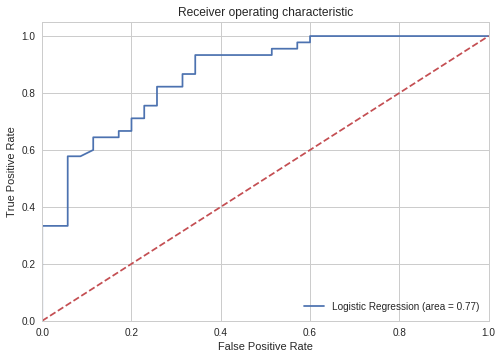

In [31]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Because the sample size is small, I will attemp to add some synthetic features. One technich is to use Mega-Trend Diffusion based on the correlation value between attributes (ref: https://pdfs.semanticscholar.org/f0dd/73d16cf7c28ba552d76432304231d04e6046.pdf)  

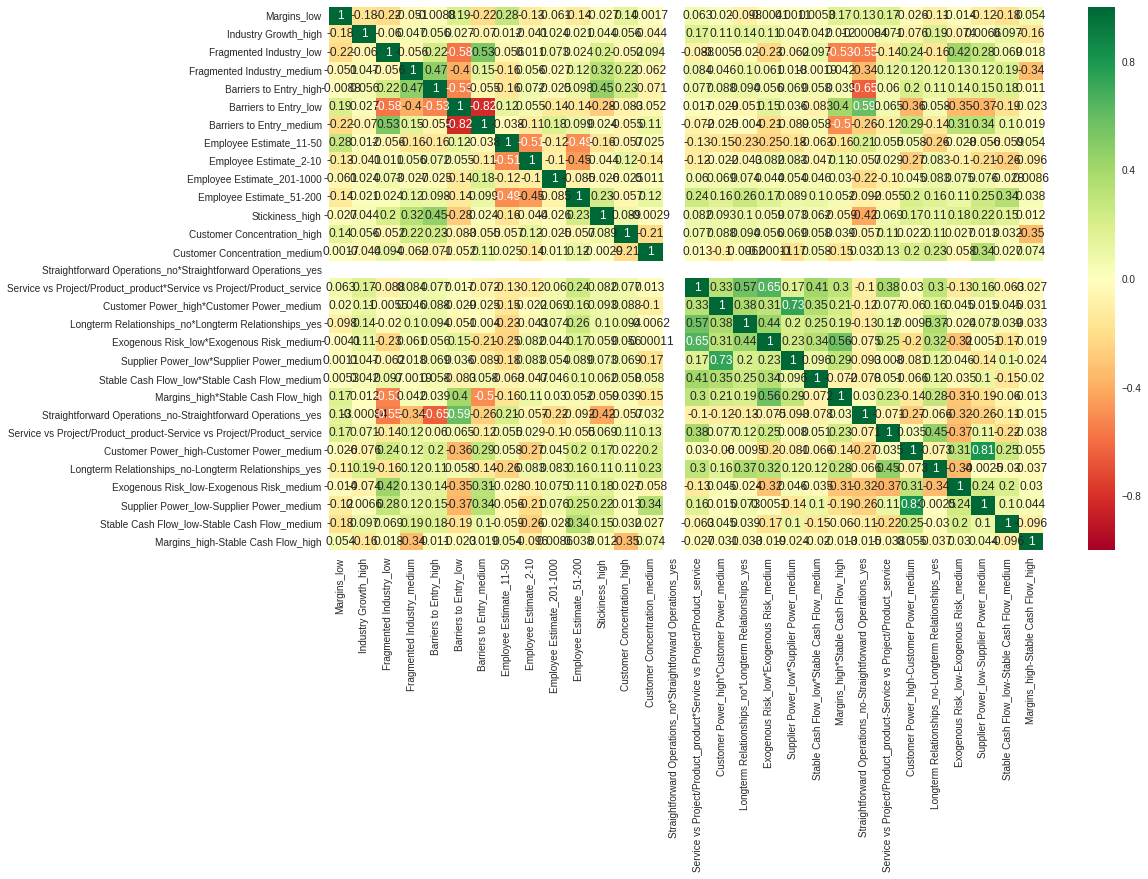

In [54]:
#view attribute correlation
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

plt.subplots(figsize=(16,10))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

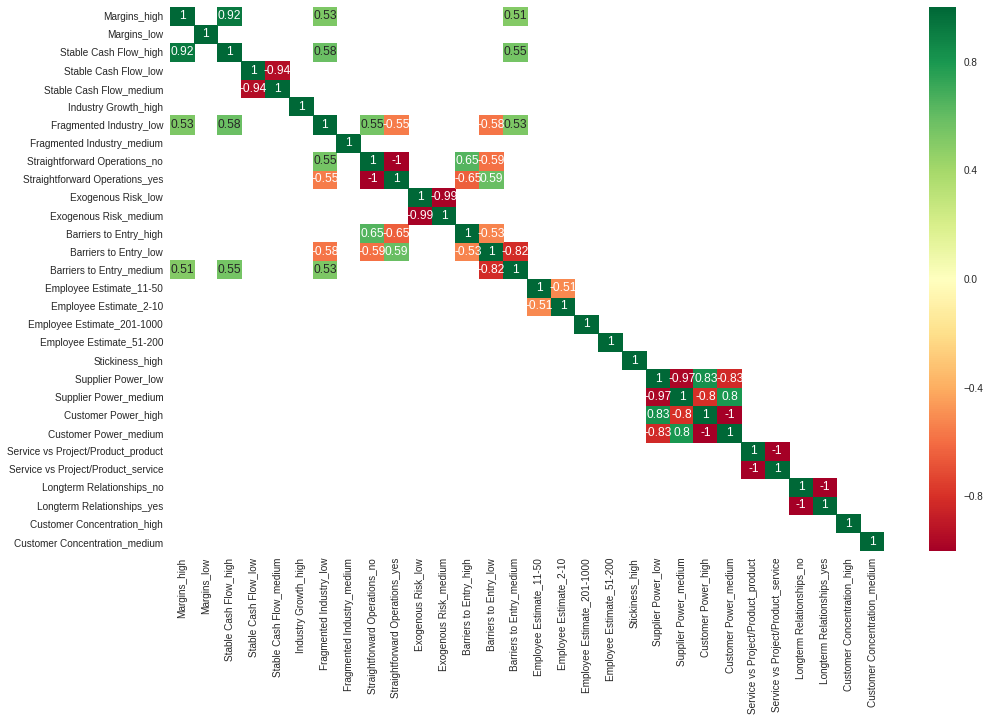

In [33]:
dataCorr = X.corr(method='pearson')
dataCorr = dataCorr[abs(dataCorr)>0.5]
plt.subplots(figsize=(16,10))
sns.heatmap(dataCorr, annot=True, cmap="RdYlGn")
plt.show()

As shown in the heat map above, feature pairs 'Barriers to Entry_high' & 'Straightforward Operations_no', 'Customer Power_high' & 'Supplier Power_low' have positive corrlaton value greater than 0.5, synthetic features are constructed for these pairs using * (multiplication) operator.

On the other hand, feature pairs 'Barriers to Entry_low' & 'Straightforward Operations_no', 'Supplier Power_medium' & 'Customer Power_high'  are negatively correlated with absoluate value of correlation greater than 0.5, synthetic features are constructed using these pairs using - (minus) operator.

{ref: https://pdfs.semanticscholar.org/f0dd/73d16cf7c28ba552d76432304231d04e6046.pdf}

{codeing ref: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas}

In [34]:
#print(X.columns)

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr(method='pearson').abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    #au_corr = au_corr[au_corr!=1]
    #Create synthetic features for the top 5 attribute fairs with highest correlation using operator * (multiplication) and - (minus)
    df[au_corr.index[0][0]+'*'+au_corr.index[0][1]] = np.where(( df[au_corr.index[0][0]]* df[au_corr.index[0][1]])>0, 0, 1)
    df[au_corr.index[1][0]+'*'+au_corr.index[1][1]] = np.where(( df[au_corr.index[1][0]]* df[au_corr.index[1][1]])>0, 0, 1)
    df[au_corr.index[2][0]+'*'+au_corr.index[2][1]] = np.where(( df[au_corr.index[2][0]]* df[au_corr.index[2][1]])>0, 0, 1)
    df[au_corr.index[3][0]+'*'+au_corr.index[3][1]] = np.where(( df[au_corr.index[3][0]]* df[au_corr.index[3][1]])>0, 0, 1)
    df[au_corr.index[4][0]+'*'+au_corr.index[4][1]] = np.where(( df[au_corr.index[4][0]]* df[au_corr.index[4][1]])>0, 0, 1)
    df[au_corr.index[5][0]+'*'+au_corr.index[5][1]] = np.where(( df[au_corr.index[5][0]]* df[au_corr.index[5][1]])>0, 0, 1)
    df[au_corr.index[6][0]+'*'+au_corr.index[6][1]] = np.where(( df[au_corr.index[6][0]]* df[au_corr.index[6][1]])>0, 0, 1)
    df[au_corr.index[7][0]+'*'+au_corr.index[7][1]] = np.where(( df[au_corr.index[7][0]]* df[au_corr.index[7][1]])>0, 0, 1)
    #Create synthetic features for the top 5 attribute fairs with highest correlation using operator - (minus)
    df[au_corr.index[0][0]+'-'+au_corr.index[0][1]] = np.where(( df[au_corr.index[0][0]]- df[au_corr.index[0][1]])>0, 0, 1)
    df[au_corr.index[1][0]+'-'+au_corr.index[1][1]] = np.where(( df[au_corr.index[1][0]]- df[au_corr.index[1][1]])>0, 0, 1)
    df[au_corr.index[2][0]+'-'+au_corr.index[2][1]] = np.where(( df[au_corr.index[2][0]]- df[au_corr.index[2][1]])>0, 0, 1)
    df[au_corr.index[3][0]+'-'+au_corr.index[3][1]] = np.where(( df[au_corr.index[3][0]]- df[au_corr.index[3][1]])>0, 0, 1)
    df[au_corr.index[4][0]+'-'+au_corr.index[4][1]] = np.where(( df[au_corr.index[4][0]]- df[au_corr.index[4][1]])>0, 0, 1)
    df[au_corr.index[5][0]+'-'+au_corr.index[5][1]] = np.where(( df[au_corr.index[5][0]]- df[au_corr.index[5][1]])>0, 0, 1)
    df[au_corr.index[6][0]+'-'+au_corr.index[6][1]] = np.where(( df[au_corr.index[6][0]]- df[au_corr.index[6][1]])>0, 0, 1)
    df[au_corr.index[7][0]+'-'+au_corr.index[7][1]] = np.where(( df[au_corr.index[7][0]]- df[au_corr.index[7][1]])>0, 0, 1)
    #drop the top 5 original features with highest correlation
    print(au_corr.index[0][0])
    if au_corr.index[0][0] in df.columns: df.drop(au_corr.index[0][0], axis=1,inplace=True)
    if au_corr.index[1][0] in df.columns: df.drop(au_corr.index[1][0], axis=1,inplace=True)
    if au_corr.index[2][0] in df.columns: df.drop(au_corr.index[2][0], axis=1,inplace=True)
    if au_corr.index[3][0] in df.columns: df.drop(au_corr.index[3][0], axis=1,inplace=True)
    if au_corr.index[4][0] in df.columns: df.drop(au_corr.index[4][0], axis=1,inplace=True)
    if au_corr.index[5][0] in df.columns: df.drop(au_corr.index[5][0], axis=1,inplace=True)
    if au_corr.index[6][0] in df.columns: df.drop(au_corr.index[6][0], axis=1,inplace=True)
    if au_corr.index[7][0] in df.columns: df.drop(au_corr.index[7][0], axis=1,inplace=True)
    if au_corr.index[0][1] in df.columns: df.drop(au_corr.index[0][1], axis=1,inplace=True)
    if au_corr.index[1][1] in df.columns: df.drop(au_corr.index[1][1], axis=1,inplace=True)
    if au_corr.index[2][1] in df.columns: df.drop(au_corr.index[2][1], axis=1,inplace=True)
    if au_corr.index[3][1] in df.columns: df.drop(au_corr.index[3][1], axis=1,inplace=True)
    if au_corr.index[4][1] in df.columns: df.drop(au_corr.index[4][1], axis=1,inplace=True)
    if au_corr.index[5][1] in df.columns: df.drop(au_corr.index[5][1], axis=1,inplace=True)
    if au_corr.index[6][1] in df.columns: df.drop(au_corr.index[6][1], axis=1,inplace=True)
    if au_corr.index[7][1] in df.columns: df.drop(au_corr.index[7][1], axis=1,inplace=True)
    return au_corr[0:n]

#use the print function to view the top correlation pairs
print("Top Absolate Correlations")
print(get_top_abs_correlations(X, 10))

Top Absolate Correlations


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

Straightforward Operations_no
Straightforward Operations_no       Straightforward Operations_yes        1.000000
Service vs Project/Product_product  Service vs Project/Product_service    1.000000
Customer Power_high                 Customer Power_medium                 1.000000
Longterm Relationships_no           Longterm Relationships_yes            1.000000
Exogenous Risk_low                  Exogenous Risk_medium                 0.985815
Supplier Power_low                  Supplier Power_medium                 0.971908
Stable Cash Flow_low                Stable Cash Flow_medium               0.939293
Margins_high                        Stable Cash Flow_high                 0.924708
Supplier Power_low                  Customer Power_high                   0.826894
                                    Customer Power_medium                 0.826894
dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [35]:
print(X.columns)
print(X.shape)

Index(['Margins_low', 'Industry Growth_high', 'Fragmented Industry_low',
       'Fragmented Industry_medium', 'Barriers to Entry_high',
       'Barriers to Entry_low', 'Barriers to Entry_medium',
       'Employee Estimate_11-50', 'Employee Estimate_2-10',
       'Employee Estimate_201-1000', 'Employee Estimate_51-200',
       'Stickiness_high', 'Customer Concentration_high',
       'Customer Concentration_medium',
       'Straightforward Operations_no*Straightforward Operations_yes',
       'Service vs Project/Product_product*Service vs Project/Product_service',
       'Customer Power_high*Customer Power_medium',
       'Longterm Relationships_no*Longterm Relationships_yes',
       'Exogenous Risk_low*Exogenous Risk_medium',
       'Supplier Power_low*Supplier Power_medium',
       'Stable Cash Flow_low*Stable Cash Flow_medium',
       'Margins_high*Stable Cash Flow_high',
       'Straightforward Operations_no-Straightforward Operations_yes',
       'Service vs Project/Product_product-

Recreat the logit model with synthetic features

In [36]:
import statsmodels.api as sm
logit_model=sm.Logit(y.astype(int),X.astype(int))
#cov_type='HC0' option is required: model.fit(cov_type='HC0') will produce correct standard errors for Poisson with dispersion.
#{ref:https://github.com/statsmodels/statsmodels/issues/3337}
result=logit_model.fit(method='bfgs',cov_type='HC0')  
print(result.summary2())

         Current function value: 0.250788
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                                                    Results: Logit
Model:                                 Logit                              Pseudo R-squared:                   0.638   
Dependent Variable:                    Score                              AIC:                                192.4158
Date:                                  2018-12-03 02:46                   BIC:                                299.6943
No. Observations:                      264                                Log-Likelihood:                     -66.208 
Df Model:                              29                                 LL-Null:                            -182.99 
Df Residuals:                          234                                Scale:                              1.0000  
Converged:                             0.0000                                        

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit the model and calculate accuracy with synthetic features. The accuracy of the Logit model with synthetic features increased from 0.78 to 0.82.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train.astype(float), y_train.astype(int))

y_pred = logreg.predict(X_test.astype(float))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Draw ROC for new model with synthetic features

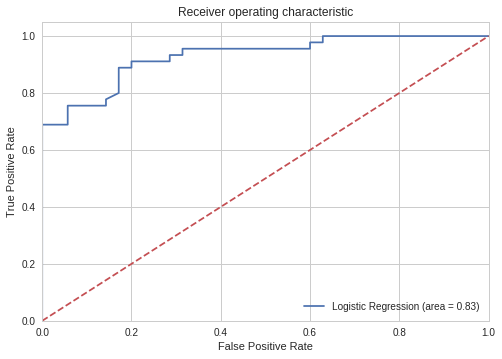

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Apply Principle Component Analysis to reduce feature space dimension after adding synthetic features and get model accuracy again (ref: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

Use 

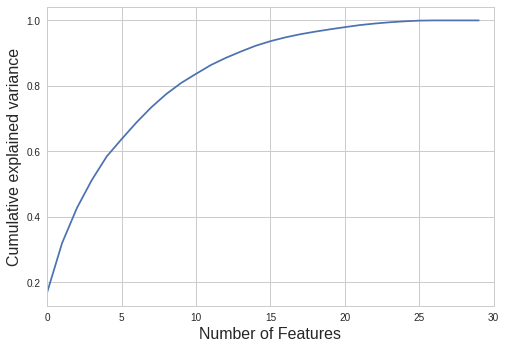

In [39]:
from sklearn.decomposition import PCA

###########################################################################################################################################################
#The Cumulative explained variance shows how much of the variance is captures by the first x features.
#Wth this graph, we can visualize that the first 15 features with the largest correlation already capture more than 90% of the variance.
#If the Regression / Classification model has low accuracy values for your , you could decide to stepwise remove the features with the lowest correlation, 
#(or stepwise add features with the highest correlation).
###########################################################################################################################################################
pca = PCA().fit(X)
var_ratio = pca.explained_variance_ratio_
components = pca.components_
#print(pca.explained_variance_)
plt.plot(np.cumsum(var_ratio))
plt.xlim(0,30,1)
plt.xlabel('Number of Features', fontsize=16)
plt.ylabel('Cumulative explained variance', fontsize=16)
plt.show()

Recreate the model using X_pca (with reduced feature space) and calculate classifier accuracy (ref: https://stackoverflow.com/questions/32860849/classification-pca-and-logistic-regression-using-sklearn).

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pca = PCA(n_components=20)
pca.fit(X)
X_pca = pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()

pipe = Pipeline([('pca', pca), ('logistic', logreg)])
pipe.fit(X_train.astype(float), y_train.astype(int))

print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

predictions = pipe.predict(X_test.astype(float))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

original shape:    (264, 30)
transformed shape: (264, 20)
Accuracy of logistic regression classifier on test set: 0.71


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Note: swap the code below to run models with or without feature reduction and compare classifer accuracy.

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.97
Accuracy of Decision Tree classifier on test set: 0.81


K-Nearest Neighbors, n_neighbors=5

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.85


K-Nearest Neighbors, n_neighbors=4

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.86


Linear Discriminant Analysis

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.89
Accuracy of LDA classifier on test set: 0.81


Gaussian Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.85
Accuracy of GNB classifier on test set: 0.84


Support Vector Machine

In [47]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.86
Accuracy of SVM classifier on test set: 0.81


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
print('Accuracy of RandomForest classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of RandomForest classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))

Accuracy of RandomForest classifier on training set: 0.97
Accuracy of RandomForest classifier on test set: 0.84


Gradient Boosting Classifie

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=1000)
gbc.fit(X_train, y_train)
print('Accuracy of Gradient Boosting classifier on training set: {:.2f}'
     .format(gbc.score(X_train, y_train)))
print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'
     .format(gbc.score(X_test, y_test)))

Accuracy of Gradient Boosting classifier on training set: 0.97
Accuracy of Gradient Boosting classifier on test set: 0.84


MLP Neural Net

In [50]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha = 1)
mlp.fit(X_train, y_train)
print('Accuracy of MLP classifier on training set: {:.2f}'
     .format(mlp.score(X_train, y_train)))
print('Accuracy of MLP classifier on test set: {:.2f}'
     .format(mlp.score(X_test, y_test)))

Accuracy of MLP classifier on training set: 0.90
Accuracy of MLP classifier on test set: 0.82


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The KNN algorithm was the most accurate model that we tried. The confusion matrix provides an indication of no error made on the test set. However, the test set was very small.

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[31  4]
 [ 7 38]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        35
           1       0.90      0.84      0.87        45

   micro avg       0.86      0.86      0.86        80
   macro avg       0.86      0.87      0.86        80
weighted avg       0.87      0.86      0.86        80



With this dataset, accuracy is at the highest when k=5.

([<matplotlib.axis.XTick at 0x7f7e0ea24fd0>,
 <a list of 5 Text xticklabel objects>)

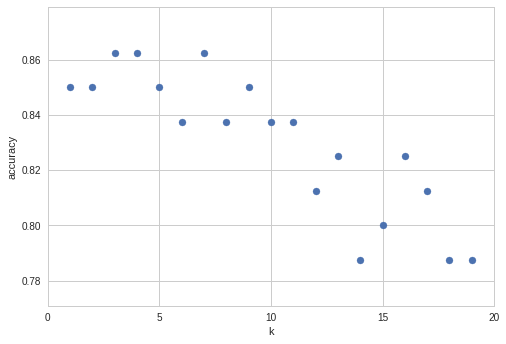

In [52]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

Tune hyperparameters for GDB (gradient boosting). The best performance for this data set is 0.83, using the combination of n_estimators = 500, learning_rate=0.01, criterion='frie' for model parameters.

In [53]:
GDB_params = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.5, 0.1, 0.01, 0.001],
    'criterion': ['friedman_mse', 'mse', 'mae']
}

for n_est in GDB_params['n_estimators']:
    for lr in GDB_params['learning_rate']:
        for crit in GDB_params['criterion']:
            gbc = GradientBoostingClassifier(n_estimators=n_est, 
                                             learning_rate = lr,
                                             criterion = crit)
            gbc.fit(X_train, y_train)
            train_score = gbc.score(X_train, y_train)
            test_score = gbc.score(X_test, y_test)
            print("For ({}, {}, {}) - train, test score: \t {:.5f} \t-\t {:.5f}".format(n_est, lr, crit[:4], train_score, test_score))

For (100, 0.5, frie) - train, test score: 	 0.97283 	-	 0.86250
For (100, 0.5, mse) - train, test score: 	 0.97283 	-	 0.86250
For (100, 0.5, mae) - train, test score: 	 0.91848 	-	 0.75000
For (100, 0.1, frie) - train, test score: 	 0.97283 	-	 0.85000
For (100, 0.1, mse) - train, test score: 	 0.97283 	-	 0.85000
For (100, 0.1, mae) - train, test score: 	 0.90217 	-	 0.77500
For (100, 0.01, frie) - train, test score: 	 0.92391 	-	 0.81250
For (100, 0.01, mse) - train, test score: 	 0.92391 	-	 0.81250
For (100, 0.01, mae) - train, test score: 	 0.87500 	-	 0.80000
For (100, 0.001, frie) - train, test score: 	 0.86413 	-	 0.80000
For (100, 0.001, mse) - train, test score: 	 0.86413 	-	 0.80000
For (100, 0.001, mae) - train, test score: 	 0.88043 	-	 0.78750
For (500, 0.5, frie) - train, test score: 	 0.97283 	-	 0.86250
For (500, 0.5, mse) - train, test score: 	 0.97283 	-	 0.86250
For (500, 0.5, mae) - train, test score: 	 0.91848 	-	 0.75000
For (500, 0.1, frie) - train, test score: